In [1]:
#install.packages('arules')
library('arules')

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
dataset = read.csv('../../pynb/05-association-rule/Market_Basket_Optimisation.csv', header = FALSE)

In [3]:
dataset = read.transactions('../../pynb/05-association-rule/Market_Basket_Optimisation.csv', sep = ',',
                            rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


In [4]:
summary(dataset)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

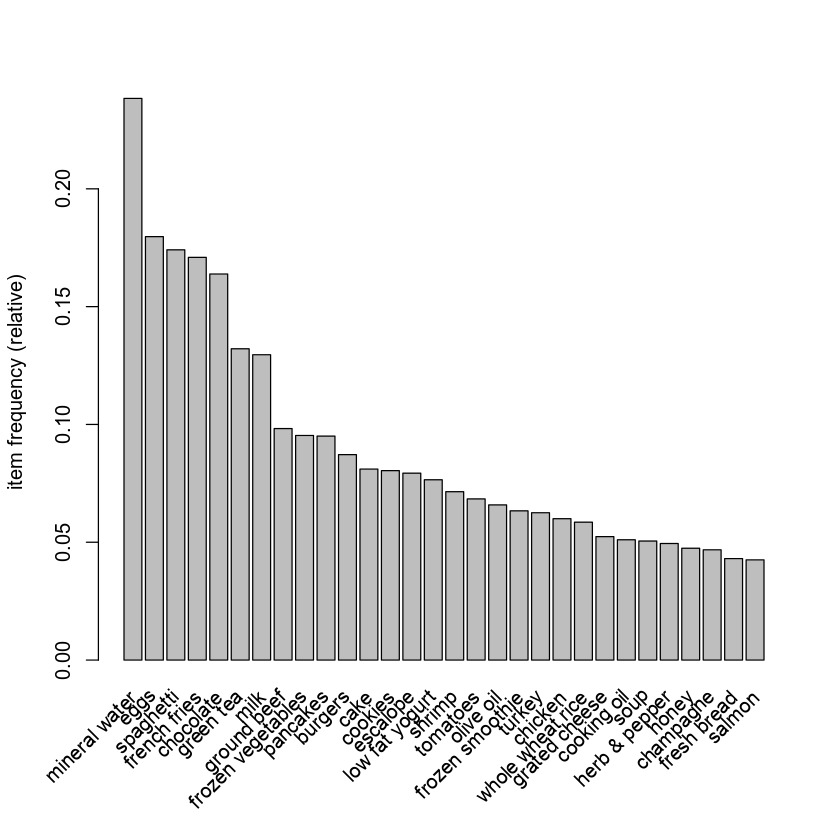

In [5]:
itemFrequencyPlot(dataset, topN =30)

In [7]:
rules = eclat(data=dataset, parameter = list(support = 0.004))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.004      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 30 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating sparse bit matrix ... [114 row(s), 7501 column(s)] done [0.00s].
writing  ... [959 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [23]:
inspect(sort(rules, by = 'lift')[1:10])

     lhs                                            rhs                
[1]  {mineral water,whole wheat pasta}           => {olive oil}        
[2]  {spaghetti,tomato sauce}                    => {ground beef}      
[3]  {french fries,herb & pepper}                => {ground beef}      
[4]  {cereals,spaghetti}                         => {ground beef}      
[5]  {frozen vegetables,mineral water,soup}      => {milk}             
[6]  {chocolate,herb & pepper}                   => {ground beef}      
[7]  {chocolate,mineral water,shrimp}            => {frozen vegetables}
[8]  {frozen vegetables,mineral water,olive oil} => {milk}             
[9]  {cereals,ground beef}                       => {spaghetti}        
[10] {frozen vegetables,soup}                    => {milk}             
     support     confidence coverage    lift     count
[1]  0.003866151 0.4027778  0.009598720 6.115863 29   
[2]  0.003066258 0.4893617  0.006265831 4.980600 23   
[3]  0.003199573 0.4615385  0.006932409 4.6